# Lesson 7 Class Exercises: Matplotlib

With these class exercises we learn a few new things.  When new knowledge is introduced you'll see the icon shown on the right: 
<span style="float:right; margin-left:10px; clear:both;">![Task](../media/new_knowledge.png)</span>

## Get Started
Import the Numpy, Pandas, Matplotlib packages and the Jupyter notebook Matplotlib magic

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Exercise 1. Load and clean the data for plotting

Import the Real Minimum Wages dataset from https://raw.githubusercontent.com/QuantEcon/lecture-source-py/master/source/_static/lecture_specific/pandas_panel/realwage.csv

In [2]:
wages = pd.read_csv('https://raw.githubusercontent.com/QuantEcon/lecture-source-py/master/source/_static/lecture_specific/pandas_panel/realwage.csv')
print(wages.shape)
wages.head()

(1408, 6)


,Unnamed: 0,Time,Country,Series,Pay period,value
0,0,2006-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,17132.443
1,1,2007-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,18100.918
2,2,2008-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,17747.406
3,3,2009-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,18580.139
4,4,2010-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,18755.832


Clean the data by performing the following:
1. Add a new column containing just the year
2. Drop rows with missing values
3. Keep only rows in the series "In 2015 constant prices at 2015 USD PPPs"
4. Keep only rows where the pay period is 'Annual'
5. Drop unwanted columns: 'Unnamed: 0', 'Time' and 'Series'
6. Rename the 'value' column as 'Salary'
7. Reset the indexes

In [3]:
#pd.to_datetime(wages['Time'])
wages['Year'] = wages['Time'].str.split('-', n=1, expand=True)[0]

In [5]:
wages.dropna(inplace=True)

In [6]:
wages2 = wages[(wages['Series'] =='In 2015 constant prices at 2015 USD PPPs')& 
     (wages['Pay period'] == 'Annual')].copy()

In [7]:
wages2['Series'].unique()

array(['In 2015 constant prices at 2015 USD PPPs'], dtype=object)

In [8]:
wages2.drop(['Unnamed: 0', 'Time','Series'], axis=1, inplace=True)

In [9]:
wages2.rename(columns={"value": "Salary"}, inplace=True)

wages2.head()

In [10]:
wages2.head()

,Country,Pay period,Salary,Year
0,Ireland,Annual,17132.443,2006
1,Ireland,Annual,18100.918,2007
2,Ireland,Annual,17747.406,2008
3,Ireland,Annual,18580.139,2009
4,Ireland,Annual,18755.832,2010


In [11]:
wages2['Salary'] = wages['Salary'].astype('float')

KeyError: 'Salary'

In [12]:
wages2.reset_index(inplace=True, drop=True)

In [13]:
wages2.head()

,Country,Pay period,Salary,Year
0,Ireland,Annual,17132.443,2006
1,Ireland,Annual,18100.918,2007
2,Ireland,Annual,17747.406,2008
3,Ireland,Annual,18580.139,2009
4,Ireland,Annual,18755.832,2010


## Exercise 2. Add a quartile group column

Find the quartiles for the minimal annual salary. Add a new column to the dataframe named `Group` that contains the values QG1, QG2, QG3 and QG4 representeding the quartile gropu (QG) to which the row belongs. Rows with a value between 0 and the first quartile get the value QG1, rows between the 1st and 2nd quartile get the value QG2, etc.

In [14]:
q1 =wages2['Salary'].quantile(0.25)
q2 =wages2['Salary'].quantile(0.50)
q3 =wages2['Salary'].quantile(0.75)
q4 =wages2['Salary'].quantile(1)
print(q1, q2, q3, q4)

6952.0789 11442.349 16778.677 23401.492


In [15]:
wages2.shape

(335, 4)

In [ ]:
group = pd.Series(np.zeros(wages.shape[0]))
group

In [ ]:
wages2['Salary'] <= q1

In [ ]:
group[(wages2['Salary'] > 0) & (wages2['Salary'] <= q1)] = 'q1'
group[(wages2['Salary'] > 0) & (wages2['Salary'] <= q2)] = 'q2'
group[(wages2['Salary'] > 0) & (wages2['Salary'] <= q3)] = 'q3'
group[(wages2['Salary'] > 0) & (wages2['Salary'] <= q4)] = 'q4'

## Exercise 3. Create a boxplot

Create a graph using a single axis that shows the boxplots of the four groups. This will allow us to see if we properly separated rows by quartiles. It will also allow us to see the spread of the data in each quartile. Be sure to lable the x-axis tick marks with the proper quantile group name.

KeyError: 'Salary'

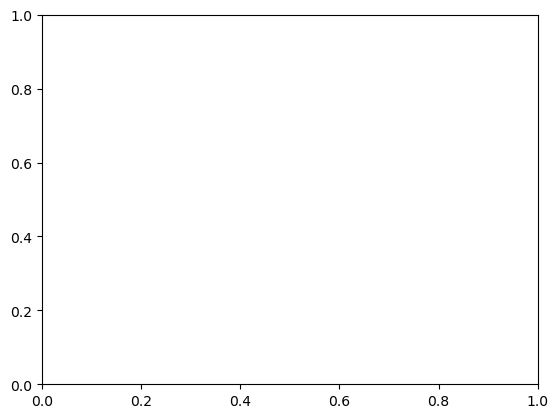

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plot = ax.boxplot(wages['Salary'])

## Exercise 4. Create a Scatterplot
Create a single scatterplot to explore if the salaries in quartile group 1 and  quartile group 4 are correlated. Hint: to compare two categories we must have an observational unit that is common between them.  Be sure to add the x and y axis labels. 

Recreate the plot above, but set a different color per year and size the points to be larger for later years and smaller for earlier years.

## Exercise 5. Create a grid of scatterplots
Now, let's see the pairwise scatterplot of each quartile group with every other group.  Create a 4x4 grid of subplots. The rows and columns of the subplot represent one of the 4 groups and each plot represents the scatterplot of those groups. You can skip the plots in the diagonal as these will always the same quartile group. 

<span style="float:right; margin-left:10px; clear:both;">![Task](../media/new_knowledge.png)</span>

Use the following code to ensure that the plot is large enough to see detail:

```python
plt.rcParams["figure.figsize"] = (12, 12)
```
The code above sets the size of the image in "inches" (i.e. 12 x 12 inches).  Also, because the x-axis and y-axis labels will be repeated, we only need to set them on the first column and last rows.  You can set the y-axis labels on the first column by using the `set` function and providing the `ylabel` argument. For example.
```python
axes[0, 0].set(ylabel="QG1")
```

You can do the same for the x-axis on the bottom row using the same style:
```python
axes[3, 0].set(xlabel="QG1")
```

Do you see any correlation between any of the groups?  If so, why do you suspect this is?

## Exercise 6. Create a grid of line plots
Now, let's create a line graph of changes over time for each quartile group.  Let's use a 2x2 subplot grid with each grid showing a different group.